# 프로젝트 1 : 당뇨병 수치

Iteration 10000 : Loss 2898.0848
Iteration 20000 : Loss 2895.2444
Iteration 30000 : Loss 2895.0533
Iteration 40000 : Loss 2895.0404
Iteration 50000 : Loss 2895.0396
Iteration 60000 : Loss 2895.0395
Iteration 70000 : Loss 2895.0395
Iteration 80000 : Loss 2895.0395
Iteration 90000 : Loss 2895.0395
Iteration 100000 : Loss 2895.0395


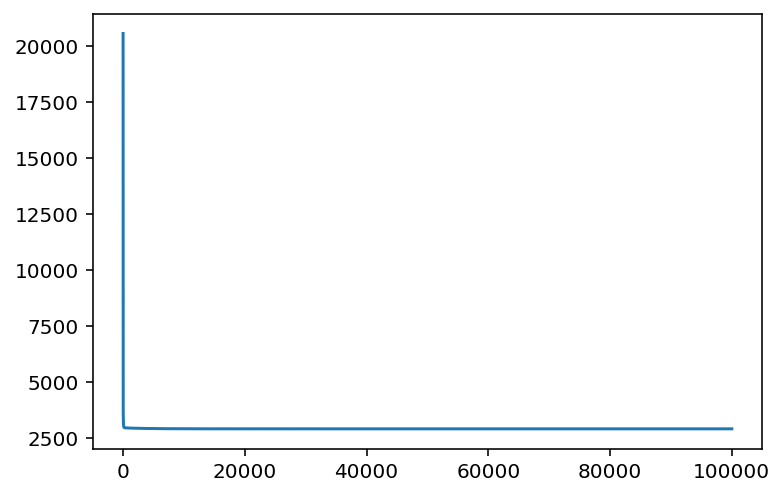

2880.720940812859


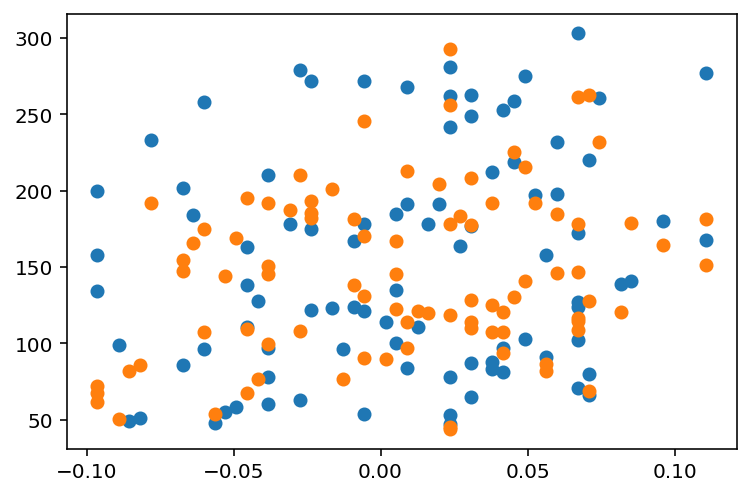

In [90]:
# (1) 데이터 가져오기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

#print(diabetes)

df_X=diabetes.data
df_y=diabetes.target


# (2) 모델에 입력할 데이터 X 준비하기
import numpy as np

np_X = np.array(df_X)

# (3) 모델에 예측할 데이터 y 준비하기

np_y = np.array(df_y)

# (4) train 데이터와 test 데이터로 분리하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np_X,
                                                    np_y,
                                                    test_size=0.2,
                                                    random_state=15)

# (5) 모델 준비하기
import numpy as np
W = np.random.rand(10)
b = np.random.rand()
W,b

def model(X,W,b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i]*W[i]
    predictions += b
    return predictions

# (6) 손실함수 loss 정의하기
def MSE(a,b):
    mse = ((a-b)**2).mean()  # 두값 차이의 제곱의 평균
    return mse

def loss(X,W,b,y):
    predictions = model(X,W,b)
    L = MSE(y,predictions)
    return L

# (7) 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    N = len(W)                          # N은 가중치의 개수
    y_pred = model(X, W, b)             # y_pred 준비
    dW = 1/N * 2 * X.T.dot(y_pred - y) # gradient 계산
    db = 2 * (y_pred - y).mean()       # b의 gradient 계산
    return dW, db

# (8) 하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 0.1

# (9) 모델 학습하기
losses = []               # 손실 변수 초기화

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #더 높은 해상도

plt.plot(losses)
plt.show()

# (10) test 데이터에 대한 성능 확인하기

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)

print(mse)

# (11) 정답 데이터와 예측한 데이터 시각화하기
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()


# 프로젝트 2 : 자전거 타는 사람은?

141.22807813517156


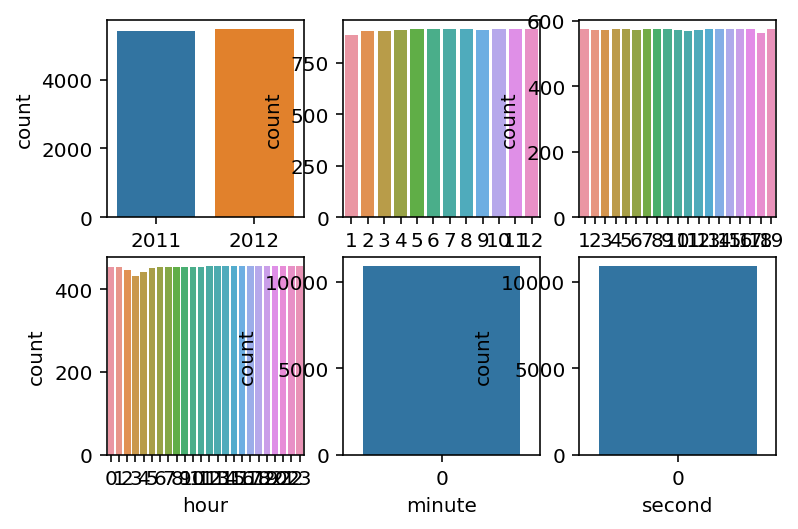

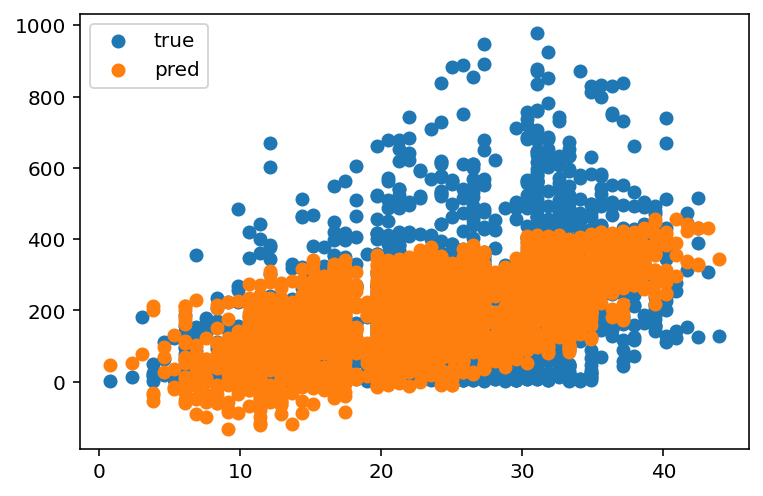

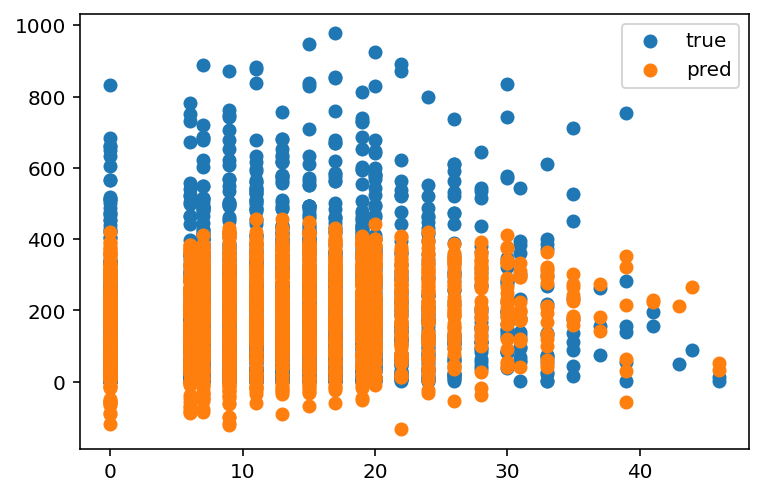

In [89]:
# (1) 데이터 가져오기
from IPython.display import display, Image
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
# print(train.shape)



# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
fig, ax = plt.subplots(2,3)
sns.countplot(x="year", data=train, ax=ax[0][0])
sns.countplot(x="month", data=train, ax=ax[0][1])
sns.countplot(x="day", data=train, ax=ax[0][2])
sns.countplot(x="hour", data=train, ax=ax[1][0])
sns.countplot(x="minute", data=train, ax=ax[1][1])
sns.countplot(x="second", data=train, ax=ax[1][2])

# (4) X, y 컬럼 선택 및 train/test 데이터 분리
from sklearn.model_selection import train_test_split

X = train[['season','holiday','workingday','weather',
           'temp','atemp','humidity','windspeed',
           'year','month','day','hour']].values
y = train['count'].values
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)


# (5) LinearRegression 모델 학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = mse**0.5

print(rmse)

# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
# x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
fig, ax = plt.subplots()
plt.scatter(X_test[:, 5], y_test, label="true")
plt.scatter(X_test[:, 5], predictions, label="pred")
plt.legend()
plt.show()

# x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기
fig, ax = plt.subplots()
plt.scatter(X_test[:, 7], y_test, label="true")
plt.scatter(X_test[:, 7], predictions, label="pred")
plt.legend()
plt.show()